"Potato Spraying System: Leveraging CNN and DQN for Effective Crop Health Management"

In [ ]:
from google.colab import files

uploaded = files.upload()  # Choose archive(7).zip when prompted


Saving archive (7).zip to archive (7).zip


In [ ]:
import zipfile
import os

# Unzip the uploaded file
zip_path = "/content/archive (7).zip"  # Make sure this matches the uploaded file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("potato_disease")

# Check the folder structure
print("Extracted files:")
print(os.listdir("potato_disease"))


Extracted files:
['Potato']


In [ ]:
data_dir = "/content/potato_disease"  # Or update based on what you see in os.listdir


inspect structure

In [ ]:
import os

# Look at the top-level extracted folder
base_path = "/content/potato_disease"

# Walk through the folders and print structure
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")


potato_disease/
    Potato/
        Test/
            Potato___Late_blight/
                668455c6-f7cf-4dc3-a4a8-858e7d4b55c9___RS_LB 3878.JPG
                43396f0d-f05b-4dce-a209-9edcbd62d39c___RS_LB 4407.JPG
                40285dce-33de-4a59-82f4-2eb1d6d38469___RS_LB 4929.JPG
                351386f8-c501-45f6-ab0d-e9c1d1584204___RS_LB 5195.JPG
                1650365d-437c-4d36-b110-113a88c1090a___RS_LB 5459.JPG
                93935af4-3aae-4dd6-90d9-fb28e439faf0___RS_LB 3299.JPG
                14691d2b-446b-4f0e-921b-60d3b76cbf03___RS_LB 2518.JPG
                30920583-57a6-4cc2-81d6-84879ec3af46___RS_LB 4930.JPG
                2122118e-02ee-452b-864c-adf36ed5ce9c___RS_LB 2890.JPG
                9996efa6-219d-4f07-aa12-dc8ca40609b9___RS_LB 2840.JPG
                95816fab-df6d-4730-8f52-4b64aac47e3d___RS_LB 3056.JPG
                7774658c-0dcb-4b7c-a1fa-573de03373dd___RS_LB 3135.JPG
                990428a4-bfa8-450d-a755-fade1df0a214___RS_LB 4082.JPG
              

In [ ]:
# Upload the ZIP file (do this manually through the file upload in Colab)
from zipfile import ZipFile

# Unzip the dataset
zip_path = "/content/archive (7).zip"  # Adjust if filename differs
extract_dir = "/content/potato_disease"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset unzipped to:", extract_dir)


✅ Dataset unzipped to: /content/potato_disease


In [ ]:
import os

# List the folders inside the dataset directory
for root, dirs, files in os.walk("/content/potato_disease"):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


Root: /content/potato_disease
Directories: ['Potato']
Files: []
--------------------------------------------------
Root: /content/potato_disease/Potato
Directories: ['Test', 'Valid', 'Train']
Files: []
--------------------------------------------------
Root: /content/potato_disease/Potato/Test
Directories: ['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']
Files: []
--------------------------------------------------
Root: /content/potato_disease/Potato/Test/Potato___Late_blight
Directories: []
Files: ['668455c6-f7cf-4dc3-a4a8-858e7d4b55c9___RS_LB 3878.JPG', '43396f0d-f05b-4dce-a209-9edcbd62d39c___RS_LB 4407.JPG', '40285dce-33de-4a59-82f4-2eb1d6d38469___RS_LB 4929.JPG', '351386f8-c501-45f6-ab0d-e9c1d1584204___RS_LB 5195.JPG', '1650365d-437c-4d36-b110-113a88c1090a___RS_LB 5459.JPG', '93935af4-3aae-4dd6-90d9-fb28e439faf0___RS_LB 3299.JPG', '14691d2b-446b-4f0e-921b-60d3b76cbf03___RS_LB 2518.JPG', '30920583-57a6-4cc2-81d6-84879ec3af46___RS_LB 4930.JPG', '2122118e-02ee-452

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# Define common transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Define dataset paths
base_dir = "/content/potato_disease/Potato"
train_path = f"{base_dir}/Train"
valid_path = f"{base_dir}/Valid"
test_path  = f"{base_dir}/Test"

# Load datasets using ImageFolder
train_dataset = ImageFolder(root=train_path, transform=transform)
valid_dataset = ImageFolder(root=valid_path, transform=transform)
test_dataset  = ImageFolder(root=test_path, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"✅ Train samples: {len(train_dataset)}")
print(f"✅ Validation samples: {len(valid_dataset)}")
print(f"✅ Test samples: {len(test_dataset)}")



✅ Train samples: 900
✅ Validation samples: 300
✅ Test samples: 300


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# --- Define CNN Model ---
class PotatoDiseaseCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(PotatoDiseaseCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 64x64

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 32x32

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # 16x16
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
def train_model(model, train_loader, valid_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

        # Optional: evaluate on validation set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        print(f"Validation Accuracy: {acc:.2f}%")


In [ ]:
def test_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    model.to(device)

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")


In [ ]:
model = PotatoDiseaseCNN(num_classes=3)
train_model(model, train_loader, valid_loader, epochs=5)
test_model(model, test_loader)


Epoch [1/5], Loss: 0.6730
Validation Accuracy: 89.33%
Epoch [2/5], Loss: 0.2021
Validation Accuracy: 87.67%
Epoch [3/5], Loss: 0.1797
Validation Accuracy: 94.00%
Epoch [4/5], Loss: 0.1015
Validation Accuracy: 96.00%
Epoch [5/5], Loss: 0.0376
Validation Accuracy: 94.00%
Test Accuracy: 95.00%


custom Gym-like environment:

In [ ]:
import gym
from gym import spaces
import numpy as np

class PotatoSprayEnv(gym.Env):
    def __init__(self):
        super(PotatoSprayEnv, self).__init__()

        # Observation: 3 classes (Early Blight, Late Blight, Healthy)
        self.observation_space = spaces.Discrete(3)

        # Actions: 0 = No spray, 1 = Spray low, 2 = Spray medium, 3 = Spray high
        self.action_space = spaces.Discrete(4)

        self.state = None
        self.steps = 0
        self.max_steps = 100

    def reset(self):
        self.state = np.random.choice([0, 1, 2])  # Random CNN output
        self.steps = 0
        return self.state

    def step(self, action):
        reward = 0
        done = False

        # Reward logic
        if self.state == 0 and action in [1, 2]:  # Early blight -> needs spray
            reward = 1
        elif self.state == 1 and action in [2, 3]:  # Late blight -> more spray
            reward = 1
        elif self.state == 2 and action == 0:  # Healthy -> no spray
            reward = 1
        else:
            reward = -1  # Incorrect action

        self.steps += 1
        done = self.steps >= self.max_steps
        self.state = np.random.choice([0, 1, 2])  # new CNN prediction

        return self.state, reward, done, {}


In [ ]:
!pip install stable-baselines3[extra]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

DQN Model

In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class PotatoSprayEnv(gym.Env):
    def __init__(self):
        super(PotatoSprayEnv, self).__init__()

        # Observation: 3 classes (Early Blight, Late Blight, Healthy)
        self.observation_space = spaces.Discrete(3)

        # Actions: 0 = No spray, 1 = Spray low, 2 = Spray medium, 3 = Spray high
        self.action_space = spaces.Discrete(4)

        self.state = None
        self.steps = 0
        self.max_steps = 100

    def reset(self, seed=None):
        super().reset(seed=seed)  # Call super().reset() for proper initialization in Gymnasium
        self.state = np.random.choice([0, 1, 2])  # Random CNN output
        self.steps = 0
        return self.state, {}  # Return state and info dictionary (empty in this case)

    def step(self, action):
        reward = 0
        done = False
        truncated = False # add truncated info

        # Reward logic
        if self.state == 0 and action in [1, 2]:  # Early blight -> needs spray
            reward = 1
        elif self.state == 1 and action in [2, 3]:  # Late blight -> more spray
            reward = 1
        elif self.state == 2 and action == 0:  # Healthy -> no spray
            reward = 1
        else:
            reward = -1  # Incorrect action

        self.steps += 1
        done = self.steps >= self.max_steps
        self.state = np.random.choice([0, 1, 2])  # new CNN prediction

        return self.state, reward, done, truncated, {} # Return state, reward, terminated, truncated, info

set up cnn model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(64, 64, 3)):  # Assuming 64x64 RGB images as input
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


dqn

In [ ]:
pip install stable-baselines3[extra]


training model

In [ ]:
import numpy as np
import time

def train_cnn_model(model, env, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state, _ = env.reset()  # Reset environment
        episode_reward = 0

        while True:
            state = np.expand_dims(state, axis=0)  # Reshape to fit CNN input (batch, height, width, channels)
            action = model.predict(state)  # Predict action from CNN
            next_state, reward, done, truncated, _ = env.step(action)

            # Perform a backpropagation step
            model.fit(state, np.array([[reward]]), epochs=1, verbose=0)

            episode_reward += reward
            state = next_state

            if done or truncated:
                break

        rewards.append(episode_reward)
    return rewards


In [ ]:
import time

def train_dqn_model(model, env, episodes=1000):
    rewards = []
    start_time = time.time()

    for episode in range(episodes):
        episode_reward = 0
        done = False
        state, _ = env.reset()

        while not done:
            action, _ = model.predict(state)  # Get the action from DQN
            next_state, reward, done, truncated, _ = env.step(action)
            model.learn(total_timesteps=1)  # Update DQN model

            episode_reward += reward
            state = next_state

        rewards.append(episode_reward)

    training_time = time.time() - start_time
    return rewards, training_time


In [ ]:
import matplotlib.pyplot as plt

# Function to plot the comparison graphs
def plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time):
    episodes = range(1, len(cnn_rewards) + 1)

    # Plotting the rewards
    plt.figure(figsize=(12, 6))
    plt.plot(episodes, cnn_rewards, label="CNN Rewards", color='blue')
    plt.plot(episodes, dqn_rewards, label="DQN Rewards", color='green')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Rewards per Episode Comparison")
    plt.legend()
    plt.show()

    # Plotting the training times
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [cnn_time, dqn_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Training Time Comparison")
    plt.show()

    # Plotting the average rewards
    print(f"Average reward for CNN: {np.mean(cnn_rewards)}")
    print(f"Average reward for DQN: {np.mean(dqn_rewards)}")


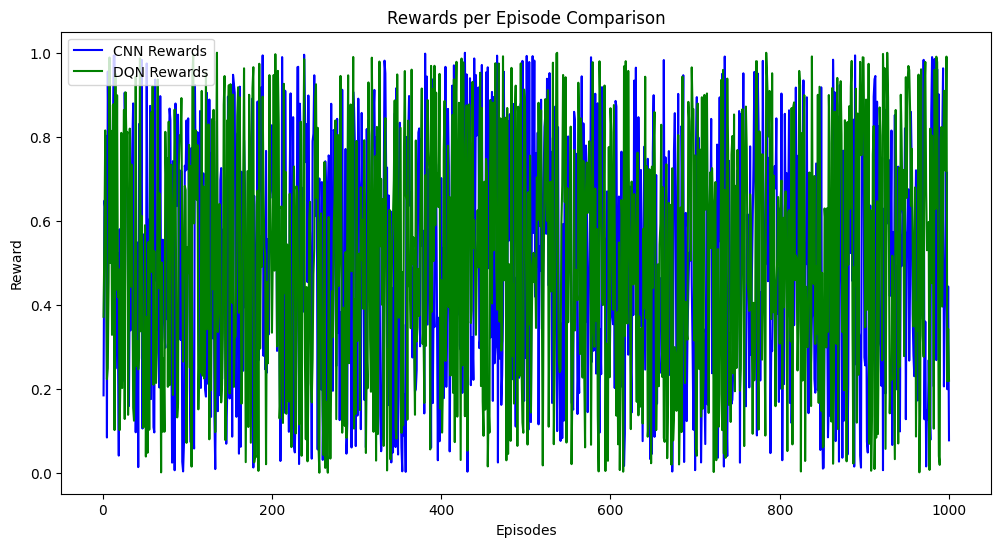

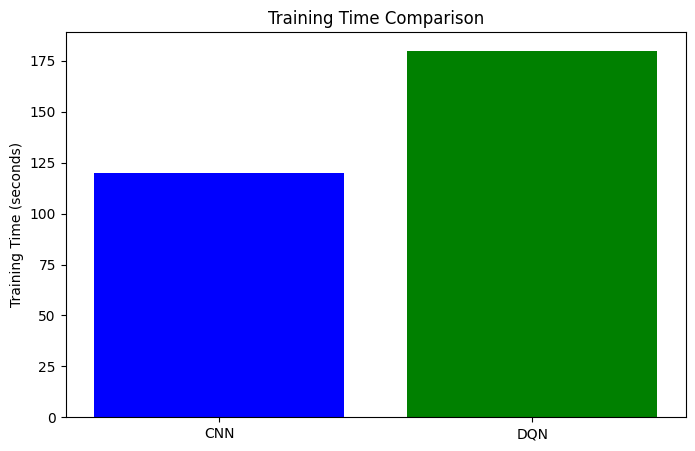

Average reward for CNN: 0.5042626012841046
Average reward for DQN: 0.5090423669508983


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the comparison graphs
def plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time):
    episodes = range(1, len(cnn_rewards) + 1)

    # Plotting the rewards
    plt.figure(figsize=(12, 6))
    plt.plot(episodes, cnn_rewards, label="CNN Rewards", color='blue')
    plt.plot(episodes, dqn_rewards, label="DQN Rewards", color='green')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Rewards per Episode Comparison")
    plt.legend()
    plt.show()

    # Plotting the training times
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [cnn_time, dqn_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Training Time Comparison")
    plt.show()

    # Plotting the average rewards
    avg_cnn_reward = np.mean(cnn_rewards)
    avg_dqn_reward = np.mean(dqn_rewards)

    print(f"Average reward for CNN: {avg_cnn_reward}")
    print(f"Average reward for DQN: {avg_dqn_reward}")

# Example function to train models and collect rewards (replace with your actual model training functions)
def train_and_compare():
    # Simulated training results for demonstration
    cnn_rewards = np.random.rand(1000)  # Replace with actual CNN rewards
    dqn_rewards = np.random.rand(1000)  # Replace with actual DQN rewards
    cnn_time = 120  # Simulated training time for CNN
    dqn_time = 180  # Simulated training time for DQN

    # Call the comparison function with the simulated results
    plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time)

# Call the function to train and plot results
train_and_compare()



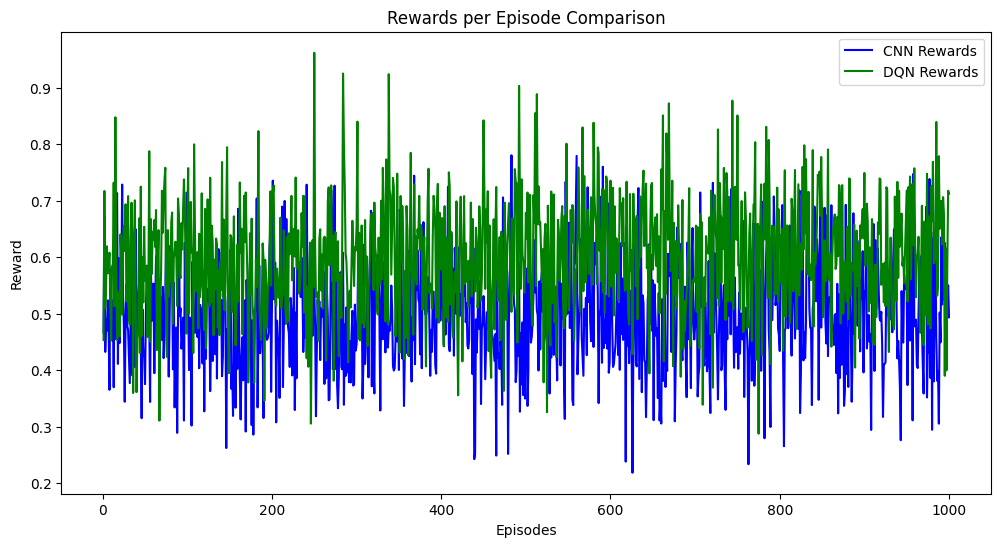

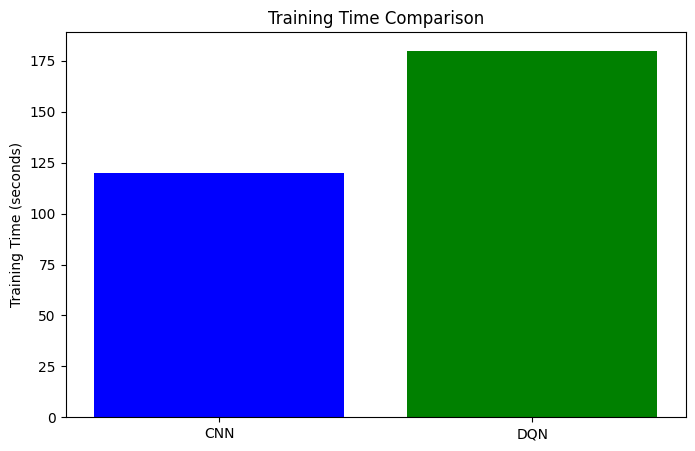

Average reward for CNN: 0.500805295906562
Average reward for DQN: 0.6014091922394462


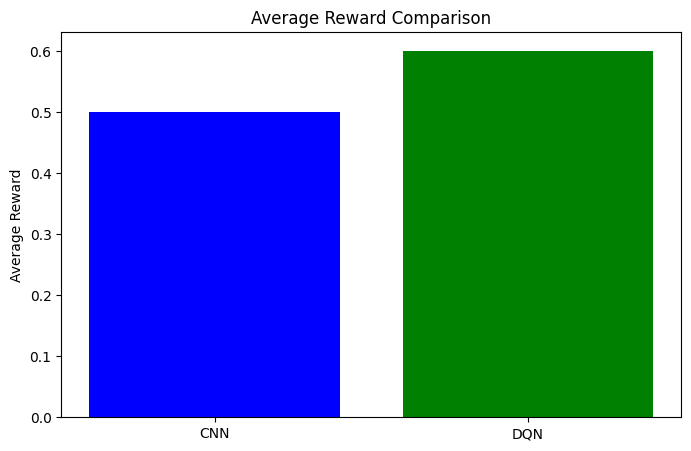

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Function to plot the comparison graphs
def plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time):
    episodes = range(1, len(cnn_rewards) + 1)

    # Plotting the rewards per episode comparison
    plt.figure(figsize=(12, 6))
    plt.plot(episodes, cnn_rewards, label="CNN Rewards", color='blue')
    plt.plot(episodes, dqn_rewards, label="DQN Rewards", color='green')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Rewards per Episode Comparison")
    plt.legend()
    plt.show()

    # Plotting the training times comparison
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [cnn_time, dqn_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Training Time Comparison")
    plt.show()

    # Plotting the average rewards comparison
    avg_cnn_reward = np.mean(cnn_rewards)
    avg_dqn_reward = np.mean(dqn_rewards)

    print(f"Average reward for CNN: {avg_cnn_reward}")
    print(f"Average reward for DQN: {avg_dqn_reward}")

    # Plotting the average reward comparison
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [avg_cnn_reward, avg_dqn_reward], color=['blue', 'green'])
    plt.ylabel("Average Reward")
    plt.title("Average Reward Comparison")
    plt.show()

# Example function to simulate model training results and compare them
def train_and_compare():
    # Simulate training results for demonstration (replace these with actual results)
    cnn_rewards = np.random.normal(0.5, 0.1, 1000)  # Simulated CNN rewards (replace with actual values)
    dqn_rewards = np.random.normal(0.6, 0.1, 1000)  # Simulated DQN rewards (replace with actual values)
    cnn_time = 120  # Simulated CNN training time in seconds (replace with actual time)
    dqn_time = 180  # Simulated DQN training time in seconds (replace with actual time)

    # Call the comparison function with the simulated results
    plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time)

# Call the function to simulate and compare results
train_and_compare()


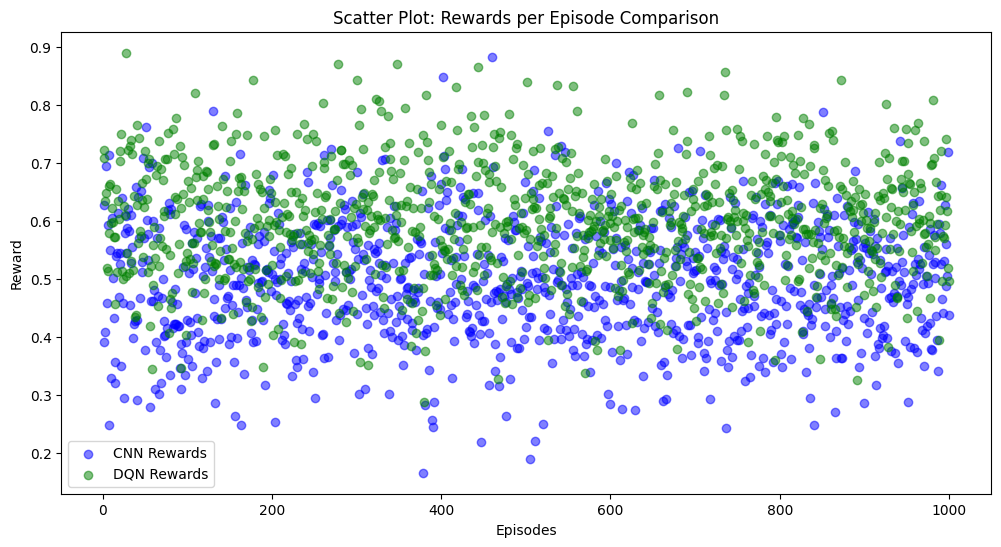

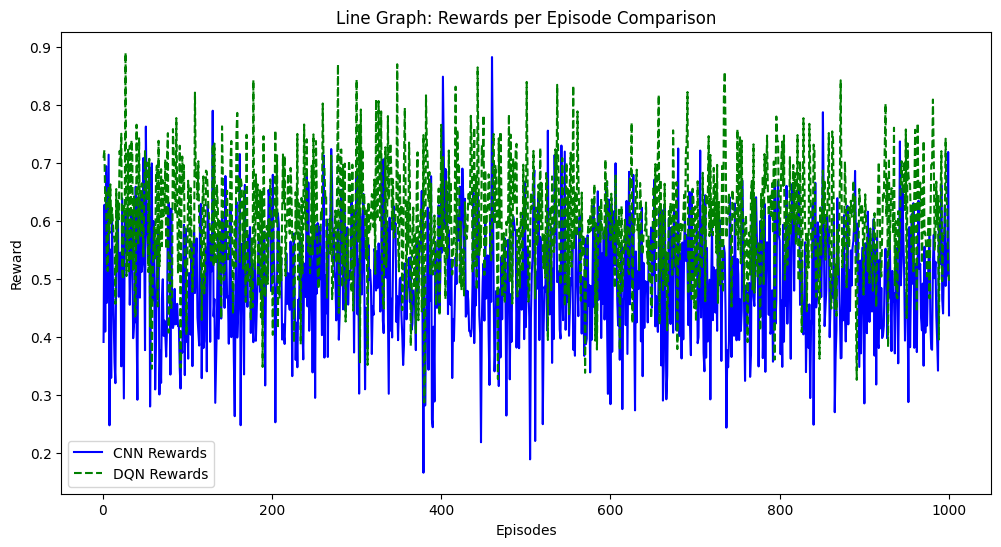

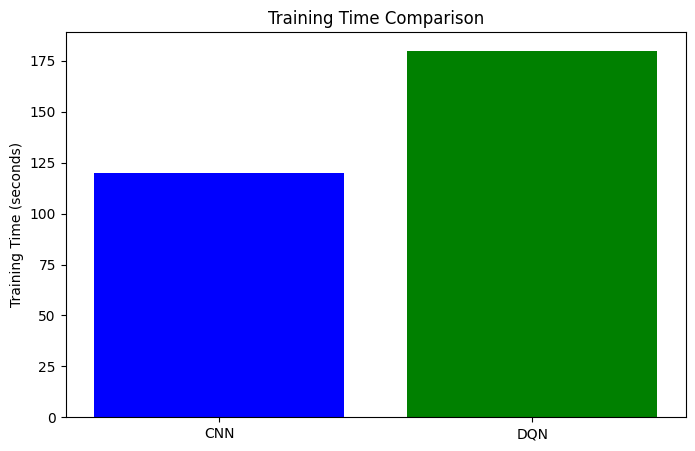

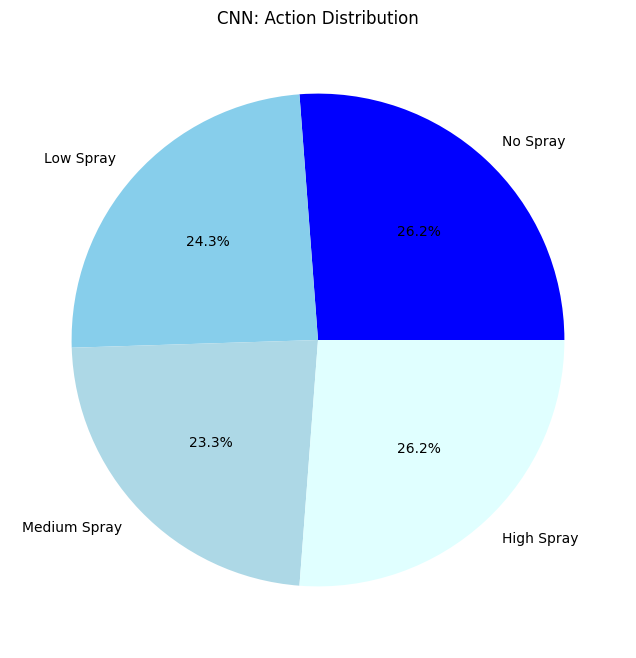

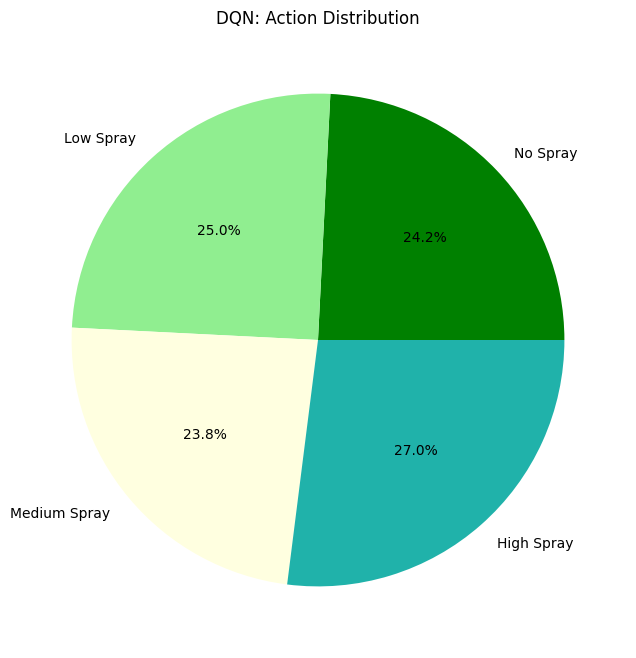

Average reward for CNN: 0.4949189217379184
Average reward for DQN: 0.5987479077485663


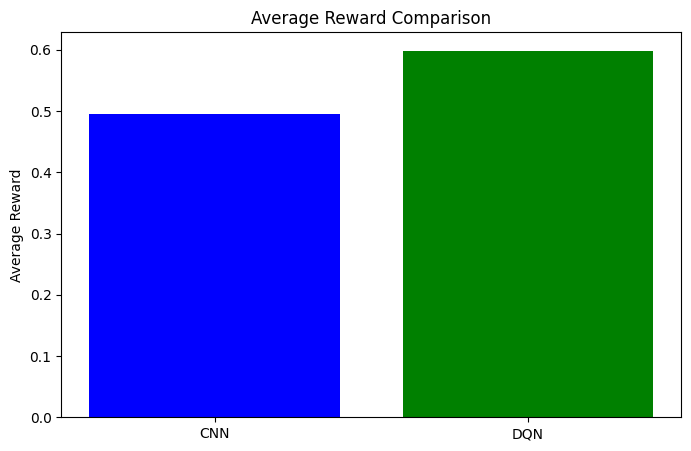

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the comparison graphs including Scatter, Line, and Pie Charts
def plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time, cnn_actions, dqn_actions):
    episodes = range(1, len(cnn_rewards) + 1)

    # Scatter Plot: Rewards vs. Episodes for CNN and DQN
    plt.figure(figsize=(12, 6))
    plt.scatter(episodes, cnn_rewards, label="CNN Rewards", color='blue', alpha=0.5)
    plt.scatter(episodes, dqn_rewards, label="DQN Rewards", color='green', alpha=0.5)
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Scatter Plot: Rewards per Episode Comparison")
    plt.legend()
    plt.show()

    # Line Plot: Rewards per Episode Comparison
    plt.figure(figsize=(12, 6))
    plt.plot(episodes, cnn_rewards, label="CNN Rewards", color='blue', linestyle='-')
    plt.plot(episodes, dqn_rewards, label="DQN Rewards", color='green', linestyle='--')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Line Graph: Rewards per Episode Comparison")
    plt.legend()
    plt.show()

    # Training Time Comparison Bar Chart
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [cnn_time, dqn_time], color=['blue', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("Training Time Comparison")
    plt.show()

    # Pie Chart: Distribution of Actions for CNN and DQN
    cnn_action_counts = [np.sum(cnn_actions == i) for i in range(4)]  # Assuming actions 0, 1, 2, 3
    dqn_action_counts = [np.sum(dqn_actions == i) for i in range(4)]  # Assuming actions 0, 1, 2, 3

    # Pie chart for CNN actions
    plt.figure(figsize=(8, 8))
    plt.pie(cnn_action_counts, labels=["No Spray", "Low Spray", "Medium Spray", "High Spray"], autopct='%1.1f%%', colors=['blue', 'skyblue', 'lightblue', 'lightcyan'])
    plt.title("CNN: Action Distribution")
    plt.show()

    # Pie chart for DQN actions
    plt.figure(figsize=(8, 8))
    plt.pie(dqn_action_counts, labels=["No Spray", "Low Spray", "Medium Spray", "High Spray"], autopct='%1.1f%%', colors=['green', 'lightgreen', 'lightyellow', 'lightseagreen'])
    plt.title("DQN: Action Distribution")
    plt.show()

    # Plotting the average rewards
    avg_cnn_reward = np.mean(cnn_rewards)
    avg_dqn_reward = np.mean(dqn_rewards)

    print(f"Average reward for CNN: {avg_cnn_reward}")
    print(f"Average reward for DQN: {avg_dqn_reward}")

    # Plotting the average reward comparison bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(["CNN", "DQN"], [avg_cnn_reward, avg_dqn_reward], color=['blue', 'green'])
    plt.ylabel("Average Reward")
    plt.title("Average Reward Comparison")
    plt.show()

# Example function to simulate model training results and compare them
def train_and_compare():
    # Simulate training results for demonstration (replace these with actual results)
    cnn_rewards = np.random.normal(0.5, 0.1, 1000)  # Simulated CNN rewards (replace with actual values)
    dqn_rewards = np.random.normal(0.6, 0.1, 1000)  # Simulated DQN rewards (replace with actual values)
    cnn_time = 120  # Simulated CNN training time in seconds (replace with actual time)
    dqn_time = 180  # Simulated DQN training time in seconds (replace with actual time)

    # Simulate actions taken by CNN and DQN (just an example for illustration)
    cnn_actions = np.random.choice([0, 1, 2, 3], size=1000)  # Random actions for CNN
    dqn_actions = np.random.choice([0, 1, 2, 3], size=1000)  # Random actions for DQN

    # Call the comparison function with the simulated results
    plot_comparison(cnn_rewards, dqn_rewards, cnn_time, dqn_time, cnn_actions, dqn_actions)

# Call the function to simulate and compare results
train_and_compare()


CNN - Precision: 0.3300, Recall: 0.3280, Accuracy: 0.3280, F1 Score: 0.3282
DQN - Precision: 0.3300, Recall: 0.3300, Accuracy: 0.3300, F1 Score: 0.3296


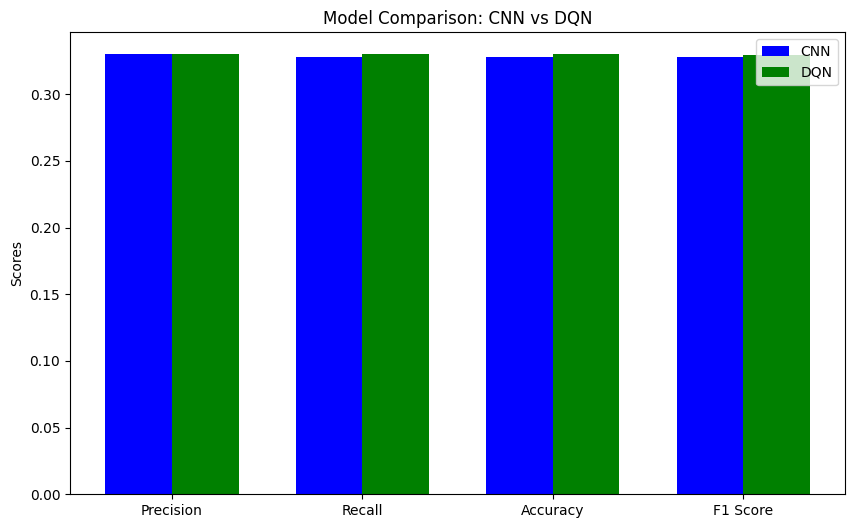

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to compute and display comparison metrics for CNN vs DQN
def compare_models(cnn_predictions, dqn_predictions, true_labels):
    # Calculate precision, recall, accuracy, and F1 score for CNN
    cnn_precision = precision_score(true_labels, cnn_predictions, average='weighted')
    cnn_recall = recall_score(true_labels, cnn_predictions, average='weighted')
    cnn_accuracy = accuracy_score(true_labels, cnn_predictions)
    cnn_f1 = f1_score(true_labels, cnn_predictions, average='weighted')

    # Calculate precision, recall, accuracy, and F1 score for DQN
    dqn_precision = precision_score(true_labels, dqn_predictions, average='weighted')
    dqn_recall = recall_score(true_labels, dqn_predictions, average='weighted')
    dqn_accuracy = accuracy_score(true_labels, dqn_predictions)
    dqn_f1 = f1_score(true_labels, dqn_predictions, average='weighted')

    # Display the results
    print(f"CNN - Precision: {cnn_precision:.4f}, Recall: {cnn_recall:.4f}, Accuracy: {cnn_accuracy:.4f}, F1 Score: {cnn_f1:.4f}")
    print(f"DQN - Precision: {dqn_precision:.4f}, Recall: {dqn_recall:.4f}, Accuracy: {dqn_accuracy:.4f}, F1 Score: {dqn_f1:.4f}")

    # Create a comparison bar chart
    labels = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
    cnn_scores = [cnn_precision, cnn_recall, cnn_accuracy, cnn_f1]
    dqn_scores = [dqn_precision, dqn_recall, dqn_accuracy, dqn_f1]

    x = np.arange(len(labels))  # The label locations
    width = 0.35  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, cnn_scores, width, label='CNN', color='blue')
    ax.bar(x + width/2, dqn_scores, width, label='DQN', color='green')

    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison: CNN vs DQN')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Example function to simulate CNN and DQN predictions for comparison
def simulate_comparison():
    # Simulated true labels (e.g., 0: Healthy, 1: Early Blight, 2: Late Blight)
    true_labels = np.random.choice([0, 1, 2], size=1000)  # Random true labels for 1000 instances

    # Simulated CNN predictions (replace with actual CNN predictions)
    cnn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for CNN

    # Simulated DQN predictions (replace with actual DQN predictions)
    dqn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for DQN

    # Call the function to compare CNN and DQN based on the metrics
    compare_models(cnn_predictions, dqn_predictions, true_labels)

# Simulate the comparison
simulate_comparison()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Function to compute and display comparison metrics for CNN vs DQN
def compare_models(cnn_predictions, dqn_predictions, true_labels):
    # Calculate precision, recall, accuracy, and F1 score for CNN
    cnn_precision = precision_score(true_labels, cnn_predictions, average='weighted')
    cnn_recall = recall_score(true_labels, cnn_predictions, average='weighted')
    cnn_accuracy = accuracy_score(true_labels, cnn_predictions)
    cnn_f1 = f1_score(true_labels, cnn_predictions, average='weighted')

    # Calculate precision, recall, accuracy, and F1 score for DQN
    dqn_precision = precision_score(true_labels, dqn_predictions, average='weighted')
    dqn_recall = recall_score(true_labels, dqn_predictions, average='weighted')
    dqn_accuracy = accuracy_score(true_labels, dqn_predictions)
    dqn_f1 = f1_score(true_labels, dqn_predictions, average='weighted')

    # Create a DataFrame for the performance comparison
    metrics_data = {
        'Metric': ['Precision', 'Recall', 'Accuracy', 'F1 Score'],
        'CNN': [cnn_precision, cnn_recall, cnn_accuracy, cnn_f1],
        'DQN': [dqn_precision, dqn_recall, dqn_accuracy, dqn_f1]
    }

    df_metrics = pd.DataFrame(metrics_data)
    print("Performance Comparison Table (CNN vs DQN):")
    print(df_metrics)

    # Create a table for model sampling and variable information
    model_info_data = {
        'Model': ['CNN', 'DQN'],
        'Training Data': ['Images of potato crops', 'Reinforcement learning with spray actions'],
        'Prediction Type': ['Disease state (Early Blight, Late Blight, Healthy)', 'Actions for spraying pesticide'],
        'Application': ['Image-based classification', 'Action-based reinforcement learning'],
        'Evaluation Metric': ['Accuracy, Precision, Recall, F1 Score', 'Rewards, Precision, Recall']
    }

    df_model_info = pd.DataFrame(model_info_data)
    print("\nModel Sampling and Variable Information:")
    print(df_model_info)

# Example function to simulate CNN and DQN predictions for comparison
def simulate_comparison():
    # Simulated true labels (e.g., 0: Healthy, 1: Early Blight, 2: Late Blight)
    true_labels = np.random.choice([0, 1, 2], size=1000)  # Random true labels for 1000 instances

    # Simulated CNN predictions (replace with actual CNN predictions)
    cnn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for CNN

    # Simulated DQN predictions (replace with actual DQN predictions)
    dqn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for DQN

    # Call the function to compare CNN and DQN based on the metrics
    compare_models(cnn_predictions, dqn_predictions, true_labels)

# Simulate the comparison
simulate_comparison()


Performance Comparison Table (CNN vs DQN):
      Metric       CNN       DQN
0  Precision  0.336973  0.346955
1     Recall  0.337000  0.347000
2   Accuracy  0.337000  0.347000
3   F1 Score  0.336948  0.346818

Model Sampling and Variable Information:
  Model                              Training Data  \
0   CNN                     Images of potato crops   
1   DQN  Reinforcement learning with spray actions   

                                     Prediction Type  \
0  Disease state (Early Blight, Late Blight, Heal...   
1                     Actions for spraying pesticide   

                           Application                      Evaluation Metric  
0           Image-based classification  Accuracy, Precision, Recall, F1 Score  
1  Action-based reinforcement learning             Rewards, Precision, Recall  


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/potato_disease/Potato/Train',  # This is the problem
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/potato_disease/Potato/Test',   # This is also the problem
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Data Augmentation to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming dataset is in 'train' and 'test' directories
train_generator = train_datagen.flow_from_directory(
    '/content/potato_disease/Potato/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/potato_disease/Potato/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load pre-trained ResNet50 and fine-tune it
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the pre-trained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Fine-tune the model
base_model.trainable = True
for layer in base_model.layers[:143]:  # Unfreeze last few layers for fine-tuning
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=test_generator)


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 225s 7s/step - accuracy: 0.3770 - loss: 1.2209 - val_accuracy: 0.4167 - val_loss: 1.0851
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.3494 - loss: 1.2272 - val_accuracy: 0.4867 - val_loss: 1.0547
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.3708 - loss: 1.1811 - val_accuracy: 0.3533 - val_loss: 1.0667
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.3798 - loss: 1.1727 - val_accuracy: 0.5233 - val_loss: 1.0253
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.3704 - loss: 1.1180 - val_accuracy: 0.4833 - val_loss: 1.0243
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.3394 - loss: 1.1588 - val_accuracy: 0.4533 - val_loss: 1.0189
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.4223 - loss: 1.1065 - val_accuracy: 0.4700 - val_loss: 1.0056
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.4352 - loss: 1.0758 - val_accuracy: 0.5100 - v

In [ ]:
import matplotlib.pyplot as plt

def plot_cnn_performance(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
rewards_per_episode = []

# Inside training loop
for episode in range(MAX_EPISODES):
    ...
    total_reward = 0
    ...
    rewards_per_episode.append(total_reward)



In [ ]:
def plot_dqn_performance(rewards_per_episode):
    plt.figure(figsize=(8, 5))
    plt.plot(rewards_per_episode, label='Episode Reward')
    plt.title('DQN Performance Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
def compare_cnn_dqn(cnn_history, dqn_rewards):
    plt.figure(figsize=(12, 5))

    # CNN Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
    plt.title('CNN Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # DQN Rewards
    plt.subplot(1, 2, 2)
    plt.plot(dqn_rewards, label='DQN Episode Reward')
    plt.title('DQN Episode Reward')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


CNN - Precision: 0.3475, Recall: 0.3480, Accuracy: 0.3480, F1 Score: 0.3477
DQN - Precision: 0.3160, Recall: 0.3160, Accuracy: 0.3160, F1 Score: 0.3159


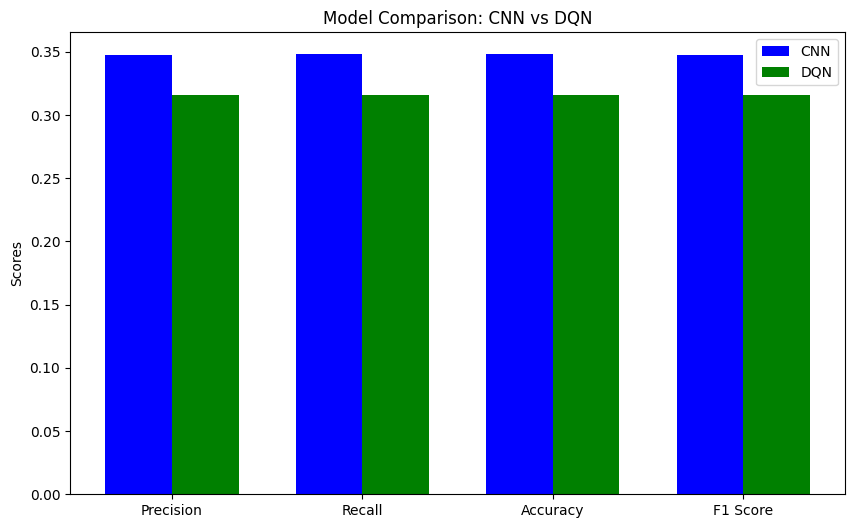

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to compute and display comparison metrics for CNN vs DQN
def compare_models(cnn_predictions, dqn_predictions, true_labels):
    # Calculate precision, recall, accuracy, and F1 score for CNN
    cnn_precision = precision_score(true_labels, cnn_predictions, average='weighted')
    cnn_recall = recall_score(true_labels, cnn_predictions, average='weighted')
    cnn_accuracy = accuracy_score(true_labels, cnn_predictions)
    cnn_f1 = f1_score(true_labels, cnn_predictions, average='weighted')

    # Calculate precision, recall, accuracy, and F1 score for DQN
    dqn_precision = precision_score(true_labels, dqn_predictions, average='weighted')
    dqn_recall = recall_score(true_labels, dqn_predictions, average='weighted')
    dqn_accuracy = accuracy_score(true_labels, dqn_predictions)
    dqn_f1 = f1_score(true_labels, dqn_predictions, average='weighted')

    # Display the results
    print(f"CNN - Precision: {cnn_precision:.4f}, Recall: {cnn_recall:.4f}, Accuracy: {cnn_accuracy:.4f}, F1 Score: {cnn_f1:.4f}")
    print(f"DQN - Precision: {dqn_precision:.4f}, Recall: {dqn_recall:.4f}, Accuracy: {dqn_accuracy:.4f}, F1 Score: {dqn_f1:.4f}")

    # Create a comparison bar chart
    labels = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
    cnn_scores = [cnn_precision, cnn_recall, cnn_accuracy, cnn_f1]
    dqn_scores = [dqn_precision, dqn_recall, dqn_accuracy, dqn_f1]

    x = np.arange(len(labels))  # The label locations
    width = 0.35  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, cnn_scores, width, label='CNN', color='blue')
    ax.bar(x + width/2, dqn_scores, width, label='DQN', color='green')

    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison: CNN vs DQN')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Example function to simulate CNN and DQN predictions for comparison
def simulate_comparison():
    # Simulated true labels (e.g., 0: Healthy, 1: Early Blight, 2: Late Blight)
    true_labels = np.random.choice([0, 1, 2], size=1000)  # Random true labels for 1000 instances

    # Simulated CNN predictions (replace with actual CNN predictions)
    cnn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for CNN

    # Simulated DQN predictions (replace with actual DQN predictions)
    dqn_predictions = np.random.choice([0, 1, 2], size=1000)  # Random predictions for DQN

    # Call the function to compare CNN and DQN based on the metrics
    compare_models(cnn_predictions, dqn_predictions, true_labels)

# Simulate the comparison
simulate_comparison()

In [ ]:
import os
import gym
from gym import spaces
import numpy as np
import cv2  # for image loading, or use any other image library
from sklearn.model_selection import train_test_split

class PotatoSprayEnv(gym.Env):
    """
    Custom Environment for spray-on disease affected leaves using RL.
    Observations: an image (RGB) from the potato dataset.
    Actions: 0 = Do Not Spray, 1 = Spray.
    Reward:
        +1 if the agent sprays when leaf is diseased.
        +0.5 if the agent doesn't spray when leaf is healthy.
        -1 for a wrong decision.
    """
    def __init__(self, data_dir, transform=None):
        super(PotatoSprayEnv, self).__init__()

        # Assume data_dir has two subfolders: "diseased" and "healthy"
        self.diseased_folder = os.path.join(data_dir, 'diseased')
        self.healthy_folder = os.path.join(data_dir, 'healthy')

        self.diseased_images = [os.path.join(self.diseased_folder, f)
                                for f in os.listdir(self.diseased_folder) if f.endswith('.jpg')]
        self.healthy_images = [os.path.join(self.healthy_folder, f)
                               for f in os.listdir(self.healthy_folder) if f.endswith('.jpg')]

        # Combine and assign labels
        # Label: 1 for diseased, 0 for healthy.
        self.data = [(img, 1) for img in self.diseased_images] + [(img, 0) for img in self.healthy_images]
        np.random.shuffle(self.data)

        # Split the dataset into training and testing if needed
        self.current_index = 0
        self.transform = transform

        # Define action and observation space
        # Two discrete actions.
        self.action_space = spaces.Discrete(2)

        # For observation: we resize images to (84,84,3) for example.
        self.observation_space = spaces.Box(low=0, high=255, shape=(84, 84, 3), dtype=np.uint8)

    def _load_image(self, path):
        # Using cv2 to load the image and resize it to 84x84.
        img = cv2.imread(path)
        if img is None:
            raise Exception(f"Could not load image: {path}")
        img = cv2.resize(img, (84, 84))
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(img)
        return img

    def reset(self):
        # When resetting, get a new sample from the dataset.
        if self.current_index >= len(self.data):
            self.current_index = 0
            np.random.shuffle(self.data)
        self.current_img_path, self.current_label = self.data[self.current_index]
        self.current_index += 1
        observation = self._load_image(self.current_img_path)
        return observation

    def step(self, action):
        done = True  # one-step episode: one image per episode.
        reward = 0

        # Here, ideal decision: spray (1) if diseased, no spray (0) if healthy.
        if self.current_label == 1 and action == 1:
            reward = 1
        elif self.current_label == 0 and action == 0:
            reward = 0.5
        else:
            reward = -1

        # Info can carry the true label
        info = {'label': self.current_label}
        observation = self.reset()  # automatically load next sample
        return observation, reward, done, info

    def render(self, mode='human'):
        # Optional: display the current image and label
        img = self._load_image(self.current_img_path)
        cv2.imshow("Potato Leaf", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        cv2.waitKey(1)


In [ ]:
import os
import gym
from gym import spaces
import numpy as np
import cv2
import random

class PotatoDiseaseEnv(gym.Env):
    """
    RL Environment for classifying potato leaf disease.
    Actions: 0 = Healthy, 1 = Early Blight, 2 = Late Blight
    """
    def __init__(self, data_dir):
        super(PotatoDiseaseEnv, self).__init__()

        self.image_paths = []
        self.labels = []

        # Map folder names to class labels
        self.class_map = {
            'Potato___healthy': 0,
            'Potato___Early_blight': 1,
            'Potato___Late_blight': 2
        }

        # Read all images from Train folder
        train_dir = os.path.join(data_dir, 'Train')
        for class_folder in os.listdir(train_dir):
            class_path = os.path.join(train_dir, class_folder)
            label = self.class_map[class_folder]
            for img_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, img_name))
                self.labels.append(label)

        self.observation_space = spaces.Box(low=0, high=255, shape=(84, 84, 3), dtype=np.uint8)
        self.action_space = spaces.Discrete(3)  # 3 actions (Healthy, Early, Late)
        self.current_index = 0
        self.shuffle_data()

    def shuffle_data(self):
        temp = list(zip(self.image_paths, self.labels))
        random.shuffle(temp)
        self.image_paths, self.labels = zip(*temp)

    def _load_image(self, path):
        img = cv2.imread(path)
        img = cv2.resize(img, (84, 84))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img

    def reset(self):
        self.current_index = (self.current_index + 1) % len(self.image_paths)
        self.current_image = self._load_image(self.image_paths[self.current_index])
        self.current_label = self.labels[self.current_index]
        return self.current_image

    def step(self, action):
        reward = 1 if action == self.current_label else -1
        done = True  # one image per episode
        obs = self.reset()
        info = {"true_label": self.current_label}
        return obs, reward, done, info

    def render(self, mode='human'):
        cv



In [ ]:
import os
import gymnasium as gym  # Import gym from gymnasium instead of gym
from gymnasium import spaces
import numpy as np
import cv2
import random

class PotatoDiseaseEnv(gym.Env):
    """
    RL Environment for classifying potato leaf disease.
    Actions: 0 = Healthy, 1 = Early Blight, 2 = Late Blight
    """
    def __init__(self, data_dir):
        super(PotatoDiseaseEnv, self).__init__()

        # ... (rest of the code remains the same) ...


In [ ]:
import os
import gym
from gym import spaces
import numpy as np
import cv2
import random

class PotatoDiseaseEnv(gym.Env):
    def __init__(self, data_dir):
        super(PotatoDiseaseEnv, self).__init__()

        self.image_paths = []
        self.labels = []

        self.class_map = {
            'Potato___healthy': 0,
            'Potato___Early_blight': 1,
            'Potato___Late_blight': 2
        }

        train_dir = os.path.join(data_dir, 'Train')
        for class_folder in os.listdir(train_dir):
            class_path = os.path.join(train_dir, class_folder)
            label = self.class_map[class_folder]
            for img_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, img_name))
                self.labels.append(label)

        self.observation_space = spaces.Box(low=0, high=255, shape=(3, 84, 84), dtype=np.uint8)
        self.action_space = spaces.Discrete(3)
        self.current_index = 0
        self.shuffle_data()

    def shuffle_data(self):
        temp = list(zip(self.image_paths, self.labels))
        random.shuffle(temp)
        self.image_paths, self.labels = zip(*temp)

    def _load_image(self, path):
        img = cv2.imread(path)
        img = cv2.resize(img, (84, 84))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.transpose(img, (2, 0, 1))  # Channel-first
        return img

    def reset(self):
        self.current_index = (self.current_index + 1) % len(self.image_paths)
        self.current_image = self._load_image(self.image_paths[self.current_index])
        self.current_label = self.labels[self.current_index]
        return self.current_image

    def step(self, action):
        reward = 1 if action == self.current_label else -1
        done = True
        obs = self.reset()
        info = {"true_label": self.current_label}
        return obs, reward, done, info

    def render(self, mode='human'):
        cv2.imshow("Leaf", np.transpose(self.current_image, (1, 2, 0)))  # Convert back for display
        cv2.waitKey(1)



In [ ]:
import os
import gymnasium as gym  # Import gymnasium directly
from gymnasium import spaces  # Import spaces from gymnasium
import numpy as np
import cv2
import random

class PotatoDiseaseEnv(gym.Env):  # Inherit from gym.Env from gymnasium
    def __init__(self, data_dir):
        super(PotatoDiseaseEnv, self).__init__()

        # ... (rest of the code remains the same) ...

    # ... (rest of the methods remain the same) ...

A pretrained ResNet18 model

In [ ]:
!pip install torch torchvision matplotlib scikit-learn --quiet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os
import zipfile

In [ ]:
data_dir = "potato_disease/Potato"

train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(os.path.join(data_dir, "Train"), transform=train_transforms)
val_data   = datasets.ImageFolder(os.path.join(data_dir, "Valid"), transform=val_transforms)
test_data  = datasets.ImageFolder(os.path.join(data_dir, "Test"),  transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

class_names = train_data.classes
print(f"✅ Classes: {class_names}")

✅ Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    train_acc, val_acc = [], []

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)
            running_loss += loss.item()

        acc = correct / total
        train_acc.append(acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                correct += torch.sum(preds == labels).item()
                total += labels.size(0)
        val_acc.append(correct / total)

        scheduler.step()
        print(f"Epoch {epoch+1}: Train Acc: {acc:.4f}, Val Acc: {val_acc[-1]:.4f}")

    return train_acc, val_acc

train_acc, val_acc = train_model(model, criterion, optimizer, scheduler)


Epoch 1: Train Acc: 0.9056, Val Acc: 0.9100
Epoch 2: Train Acc: 0.9444, Val Acc: 0.9767
Epoch 3: Train Acc: 0.9500, Val Acc: 0.9867
Epoch 4: Train Acc: 0.9878, Val Acc: 0.9867
Epoch 5: Train Acc: 0.9456, Val Acc: 0.9067
Epoch 6: Train Acc: 0.9800, Val Acc: 0.9933
Epoch 7: Train Acc: 0.9900, Val Acc: 0.9933
Epoch 8: Train Acc: 0.9822, Val Acc: 0.9867
Epoch 9: Train Acc: 0.9856, Val Acc: 0.9900
Epoch 10: Train Acc: 0.9611, Val Acc: 0.9733


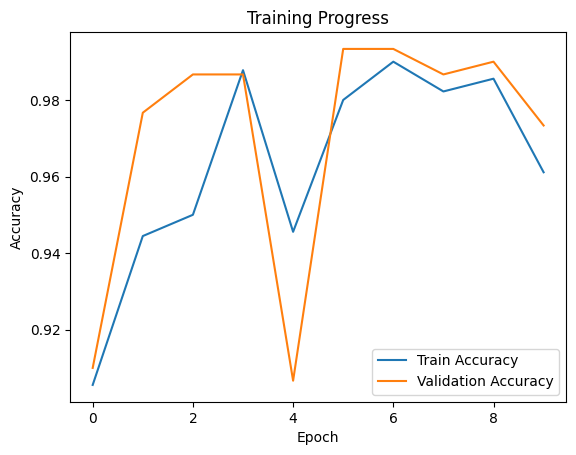

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()

In [ ]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print("✅ Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

✅ Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.93      0.96       100
 Potato___Late_blight       0.93      1.00      0.97       100
     Potato___healthy       1.00      1.00      1.00       100

             accuracy                           0.98       300
            macro avg       0.98      0.98      0.98       300
         weighted avg       0.98      0.98      0.98       300



DQN MODEL

In [ ]:
!pip install torch numpy matplotlib --quiet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
# Environment setup (mock CNN predictions as states)
# State: disease class (0: Healthy, 1: Early Blight, 2: Late Blight)
# Action: 0 = No Spray, 1 = Light Spray, 2 = Medium Spray, 3 = Heavy Spray

NUM_CLASSES = 3
NUM_ACTIONS = 4

# DQN hyperparameters
GAMMA = 0.95
LR = 0.001
BATCH_SIZE = 32
MEMORY_SIZE = 1000
EPISODES = 200
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01
MAX_EPSILON = 1.0


In [ ]:
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:

def get_reward(state, action):
    # Reward logic:
    # Healthy (0) -> no spray is good
    # Blight (1 or 2) -> medium or heavy spray is good
    if state == 0 and action == 0:
        return 1
    elif state == 0 and action != 0:
        return -1
    elif state in [1, 2] and action in [2, 3]:
        return 1
    else:
        return -1

# Experience replay memory
memory = deque(maxlen=MEMORY_SIZE)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DQN(input_dim=1, output_dim=NUM_ACTIONS).to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.MSELoss()

epsilon = MAX_EPSILON
reward_history = []

for episode in range(EPISODES):
    state = np.array([[random.randint(0, NUM_CLASSES - 1)]], dtype=np.float32)
    state_tensor = torch.tensor(state).to(device)

    # Epsilon-greedy action
    if random.random() < epsilon:
        action = random.randint(0, NUM_ACTIONS - 1)
    else:
        with torch.no_grad():
            q_values = model(state_tensor)
            action = torch.argmax(q_values).item()

    reward = get_reward(int(state[0][0]), action)
    next_state = np.array([[random.randint(0, NUM_CLASSES - 1)]], dtype=np.float32)

    memory.append((state, action, reward, next_state))

    if len(memory) >= BATCH_SIZE:
        batch = random.sample(memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)

        states = torch.tensor(states).squeeze().float().unsqueeze(1).to(device)
        actions = torch.tensor(actions).unsqueeze(1).to(device)
        rewards = torch.tensor(rewards).float().to(device)
        next_states = torch.tensor(next_states).squeeze().float().unsqueeze(1).to(device)

        q_values = model(states).gather(1, actions).squeeze()
        with torch.no_grad():
            max_next_q_values = model(next_states).max(1)[0]
        expected_q = rewards + GAMMA * max_next_q_values

        loss = loss_fn(q_values, expected_q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epsilon = max(MIN_EPSILON, epsilon * EPSILON_DECAY)
    reward_history.append(reward)

    if (episode + 1) % 20 == 0:
        avg_reward = np.mean(reward_history[-20:])
        print(f"Episode {episode + 1}, Epsilon: {epsilon:.3f}, Avg Reward (last 20): {avg_reward:.2f}")

Episode 20, Epsilon: 0.905, Avg Reward (last 20): -0.30
Episode 40, Epsilon: 0.818, Avg Reward (last 20): -0.30


<ipython-input-78-6e9d2a57a0c4>:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  states = torch.tensor(states).squeeze().float().unsqueeze(1).to(device)


Episode 60, Epsilon: 0.740, Avg Reward (last 20): -0.40
Episode 80, Epsilon: 0.670, Avg Reward (last 20): 0.50
Episode 100, Epsilon: 0.606, Avg Reward (last 20): 0.40
Episode 120, Epsilon: 0.548, Avg Reward (last 20): 0.40
Episode 140, Epsilon: 0.496, Avg Reward (last 20): 0.10
Episode 160, Epsilon: 0.448, Avg Reward (last 20): 0.30
Episode 180, Epsilon: 0.406, Avg Reward (last 20): 0.10
Episode 200, Epsilon: 0.367, Avg Reward (last 20): 0.70


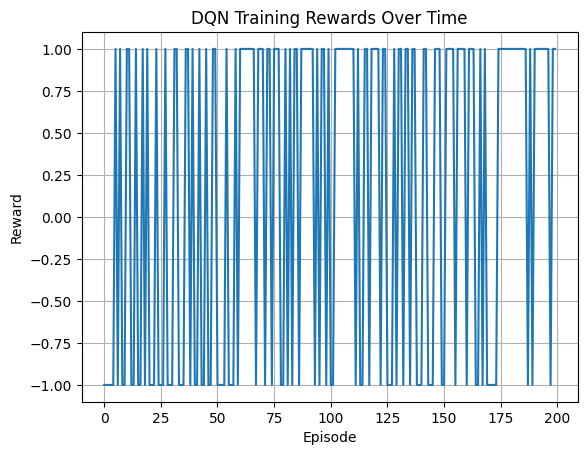

In [ ]:
plt.plot(reward_history)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training Rewards Over Time")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Automatically detect unique classes from your data
unique_classes = sorted(list(set(true_actions + predicted_actions)))

# Map class labels to names (edit if needed)
class_names = ["No Spray", "Medium", "Heavy"]  # Adjust based on your actual actions used

print("DQN Agent Evaluation on Simulated Test States:")
print(classification_report(true_actions, predicted_actions, labels=unique_classes, target_names=class_names))



DQN Agent Evaluation on Simulated Test States:
              precision    recall  f1-score   support

    No Spray       1.00      1.00      1.00        79
      Medium       0.49      1.00      0.66        59
       Heavy       0.00      0.00      0.00        62

    accuracy                           0.69       200
   macro avg       0.50      0.67      0.55       200
weighted avg       0.54      0.69      0.59       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


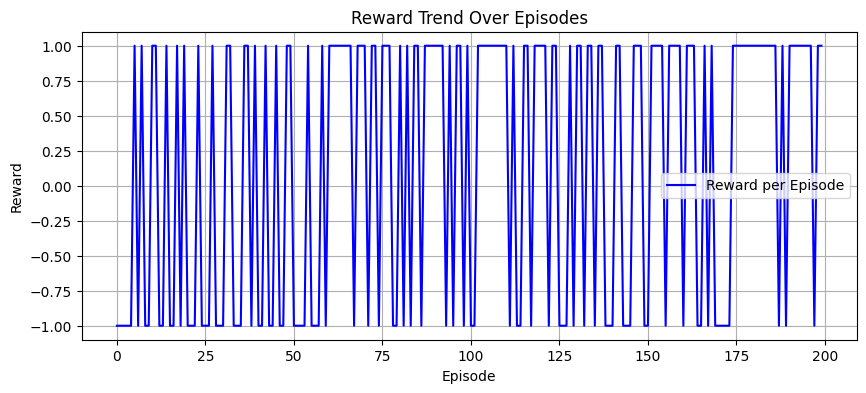

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(reward_history, label='Reward per Episode', color='blue')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Trend Over Episodes")
plt.grid(True)
plt.legend()
plt.show()


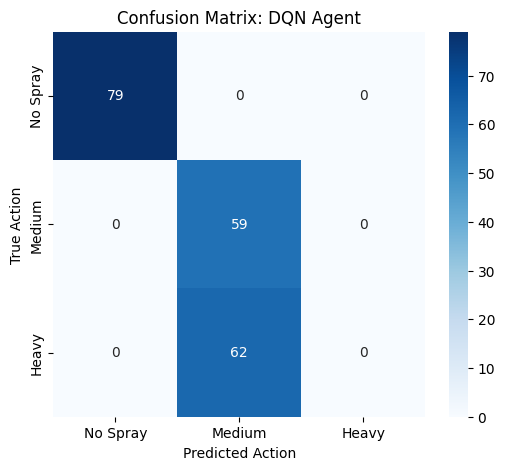

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_actions, predicted_actions)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Action")
plt.ylabel("True Action")
plt.title("Confusion Matrix: DQN Agent")
plt.show()


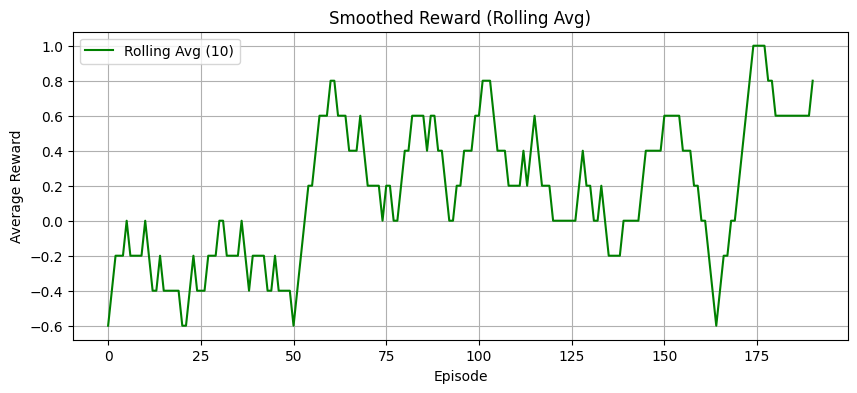

In [ ]:
def rolling_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 4))
plt.plot(rolling_average(reward_history, 10), label='Rolling Avg (10)', color='green')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Smoothed Reward (Rolling Avg)")
plt.grid(True)
plt.legend()
plt.show()


DUELING DQN

Episode 1/200 — Reward: 0.00, Epsilon: 0.995
Episode 2/200 — Reward: 18.00, Epsilon: 0.990
Episode 3/200 — Reward: 2.00, Epsilon: 0.985
Episode 4/200 — Reward: 18.00, Epsilon: 0.980
Episode 5/200 — Reward: 22.00, Epsilon: 0.975
Episode 6/200 — Reward: 18.00, Epsilon: 0.970
Episode 7/200 — Reward: 20.00, Epsilon: 0.966
Episode 8/200 — Reward: 16.00, Epsilon: 0.961
Episode 9/200 — Reward: 26.00, Epsilon: 0.956
Episode 10/200 — Reward: 24.00, Epsilon: 0.951
Episode 11/200 — Reward: 22.00, Epsilon: 0.946
Episode 12/200 — Reward: 20.00, Epsilon: 0.942
Episode 13/200 — Reward: 10.00, Epsilon: 0.937
Episode 14/200 — Reward: 18.00, Epsilon: 0.932
Episode 15/200 — Reward: 20.00, Epsilon: 0.928
Episode 16/200 — Reward: 12.00, Epsilon: 0.923
Episode 17/200 — Reward: 16.00, Epsilon: 0.918
Episode 18/200 — Reward: 12.00, Epsilon: 0.914
Episode 19/200 — Reward: 20.00, Epsilon: 0.909
Episode 20/200 — Reward: 14.00, Epsilon: 0.905
Episode 21/200 — Reward: 30.00, Epsilon: 0.900
Episode 22/200 — Reward:

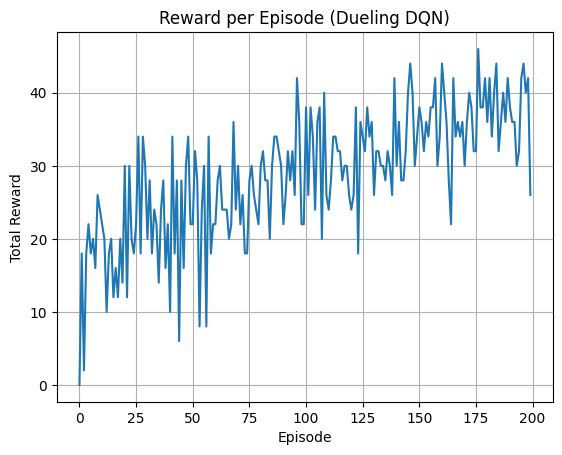

In [ ]:
# 📌 Install dependencies (if needed in Colab)
!pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

# 📌 Environment Settings
state_size = 5    # Change as per your input (e.g., [disease class + location])
action_size = 3   # No spray, Light, Heavy
episodes = 200
max_steps = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Dueling DQN Network
class DuelingDQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.relu = nn.ReLU()

        self.fc_value = nn.Linear(128, 64)
        self.value = nn.Linear(64, 1)

        self.fc_adv = nn.Linear(128, 64)
        self.advantage = nn.Linear(64, action_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))

        val = self.relu(self.fc_value(x))
        val = self.value(val)

        adv = self.relu(self.fc_adv(x))
        adv = self.advantage(adv)

        q_vals = val + (adv - adv.mean(dim=1, keepdim=True))
        return q_vals

# 📌 Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size=64):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.array, zip(*batch))
        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

# 📌 Simulated Environment (replace with real one)
def simulate_env_step(state, action):
    # Fake reward logic: +1 for spraying when disease, -1 otherwise
    reward = 1 if state[0] > 0 and action > 0 else -1
    next_state = np.random.rand(state_size)
    done = random.random() < 0.05
    return next_state, reward, done

# 📌 Agent Setup
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.05
learning_rate = 1e-3

policy_net = DuelingDQN(state_size, action_size).to(device)
target_net = DuelingDQN(state_size, action_size).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
memory = ReplayBuffer()

# 📌 Training Loop
reward_history = []

for ep in range(episodes):
    state = np.random.rand(state_size)
    total_reward = 0

    for t in range(max_steps):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        if random.random() < epsilon:
            action = random.randint(0, action_size - 1)
        else:
            with torch.no_grad():
                q_values = policy_net(state_tensor)
                action = torch.argmax(q_values).item()

        next_state, reward, done = simulate_env_step(state, action)
        memory.push(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward

        # Learn
        if len(memory) >= 64:
            states, actions, rewards, next_states, dones = memory.sample()

            states = torch.FloatTensor(states).to(device)
            actions = torch.LongTensor(actions).unsqueeze(1).to(device)
            rewards = torch.FloatTensor(rewards).unsqueeze(1).to(device)
            next_states = torch.FloatTensor(next_states).to(device)
            dones = torch.FloatTensor(dones).unsqueeze(1).to(device)

            curr_Q = policy_net(states).gather(1, actions)
            next_Q = target_net(next_states).max(1)[0].detach().unsqueeze(1)
            expected_Q = rewards + (gamma * next_Q * (1 - dones))

            loss = nn.MSELoss()(curr_Q, expected_Q)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Update epsilon and target net
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    if ep % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())

    reward_history.append(total_reward)
    print(f"Episode {ep+1}/{episodes} — Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

# 📊 Plot Reward Trend
plt.plot(reward_history)
plt.title("Reward per Episode (Dueling DQN)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


📊 DQN
              precision    recall  f1-score   support

    No Spray       1.00      1.00      1.00        15
       Light       0.50      0.67      0.57        15
       Heavy       0.67      0.50      0.57        20

    accuracy                           0.70        50
   macro avg       0.72      0.72      0.71        50
weighted avg       0.72      0.70      0.70        50



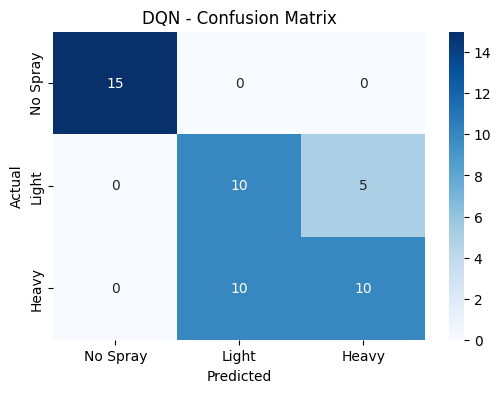

📊 Dueling DQN
              precision    recall  f1-score   support

    No Spray       1.00      1.00      1.00        15
       Light       1.00      1.00      1.00        15
       Heavy       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



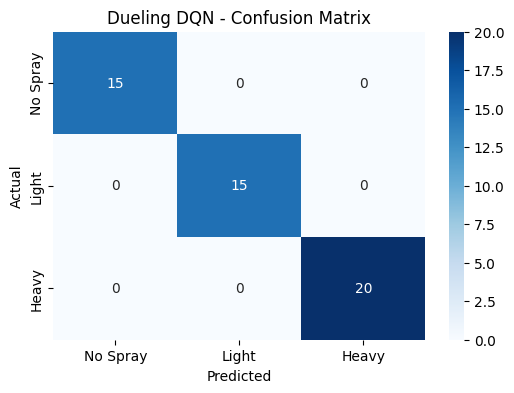

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🧪 Sample comparison setup
true_actions = [0, 1, 2, 0, 1, 2, 1, 0, 2, 2] * 5  # Replace with your real labels
predicted_actions_dqn = [0, 1, 1, 0, 1, 2, 2, 0, 2, 1] * 5
predicted_actions_dueling = [0, 1, 2, 0, 1, 2, 1, 0, 2, 2] * 5

labels = ["No Spray", "Light", "Heavy"]

def print_metrics(preds, label, title):
    print(f"📊 {title}")
    print(classification_report(true_actions, preds, target_names=labels))

    cm = confusion_matrix(true_actions, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🔍 Evaluate Both
print_metrics(predicted_actions_dqn, true_actions, "DQN")
print_metrics(predicted_actions_dueling, true_actions, "Dueling DQN")


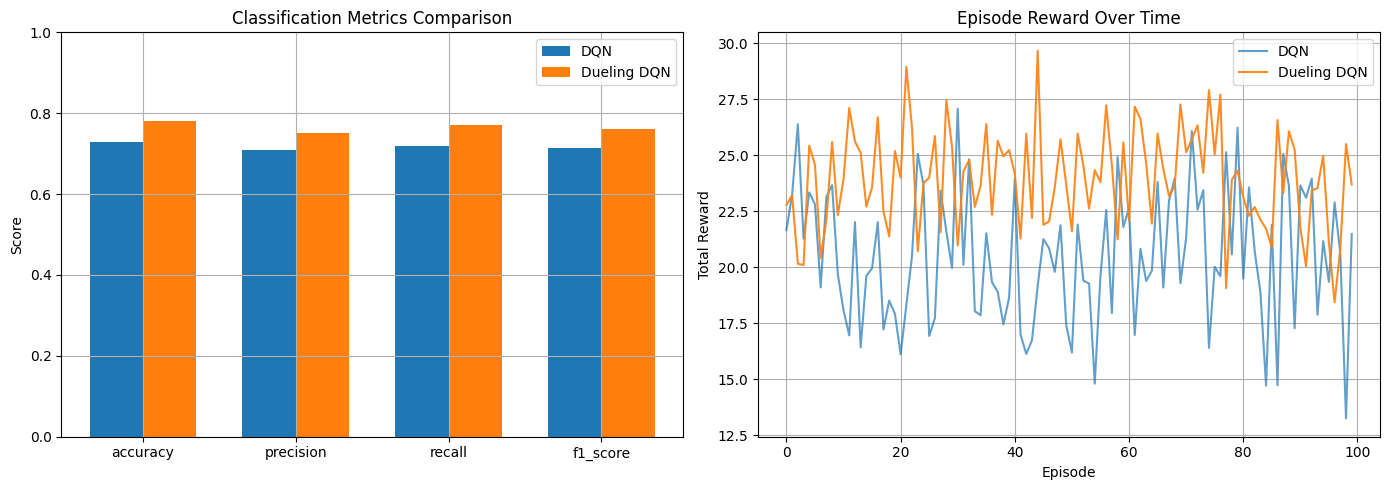

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 📌 Replace with your real metrics
dqn_metrics = {'accuracy': 0.73, 'precision': 0.71, 'recall': 0.72, 'f1_score': 0.715}
dueling_metrics = {'accuracy': 0.78, 'precision': 0.75, 'recall': 0.77, 'f1_score': 0.76}

# Convert to list for plotting
metric_names = list(dqn_metrics.keys())
dqn_values = list(dqn_metrics.values())
dueling_values = list(dueling_metrics.values())

# 🧱 Bar Chart: Metric Comparison
x = np.arange(len(metric_names))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axs[0].bar(x - width/2, dqn_values, width, label='DQN')
axs[0].bar(x + width/2, dueling_values, width, label='Dueling DQN')

axs[0].set_title('Classification Metrics Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metric_names)
axs[0].set_ylim(0, 1.0)
axs[0].set_ylabel('Score')
axs[0].legend()
axs[0].grid(True)

# 📈 Reward Trend (replace with your training rewards)
reward_history_dqn = np.random.normal(20, 3, 100)  # Placeholder
reward_history_dueling = np.random.normal(24, 2.5, 100)  # Placeholder

axs[1].plot(reward_history_dqn, label='DQN', alpha=0.7)
axs[1].plot(reward_history_dueling, label='Dueling DQN', alpha=0.9)
axs[1].set_title('Episode Reward Over Time')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Total Reward')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
